# simple linear regression Q_1
1) Delivery_time -> Predict delivery time using sorting time
2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [2]:
import pandas as pd #Data Manipulation
import seaborn as sns #Data Visualization
import numpy as np #Numerical Python
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset (delivery_time.csv)
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [4]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
#display column name
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [6]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
#display describe
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
#checking is their any null value present
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
df.shape

(21, 2)

# feature engineering

In [10]:
# Renaming Columns
df =df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# original data visualization

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

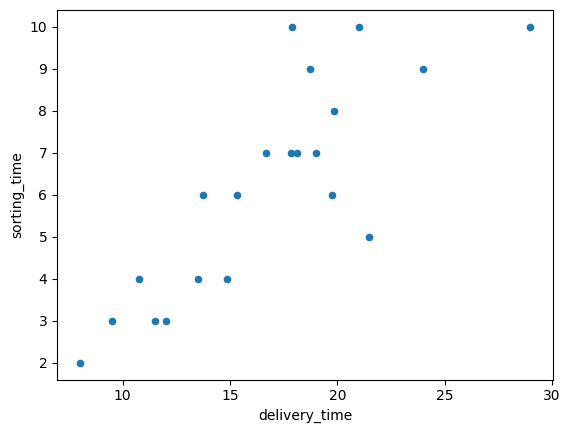

In [11]:
df.plot(x='delivery_time', y='sorting_time',kind='scatter')

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

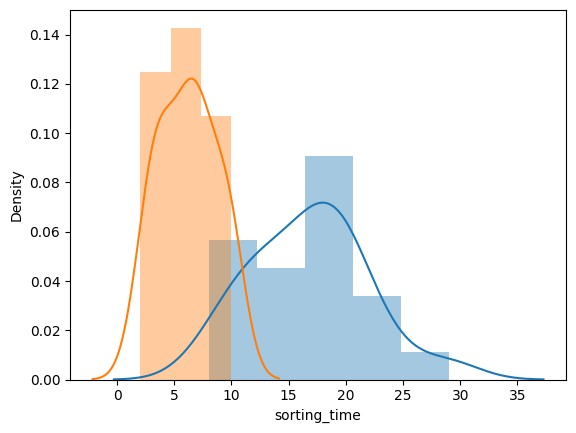

In [12]:
#data visualization using distplot
sns.distplot(df['delivery_time'])
sns.distplot(df['sorting_time'])

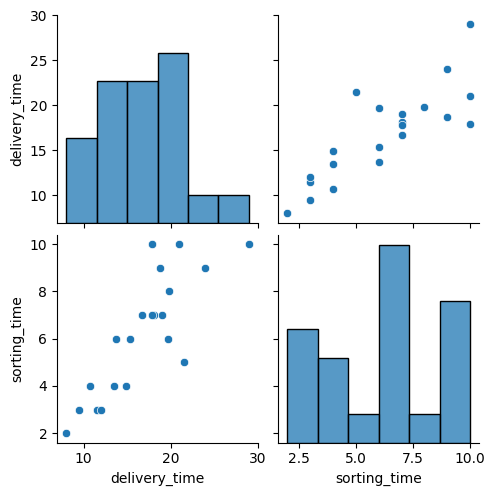

In [13]:
#visualization using pairplot
sns.pairplot(df)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

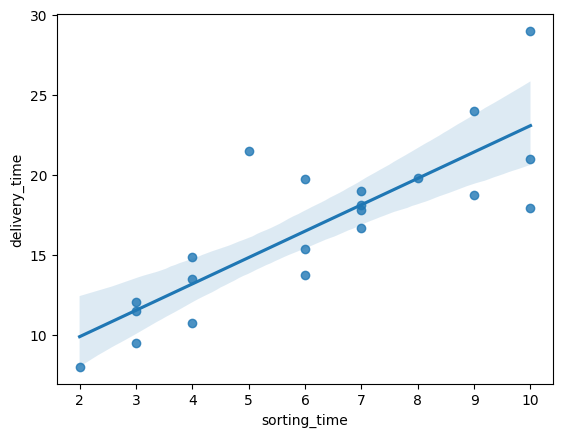

In [14]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

# correlation analysis

In [15]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

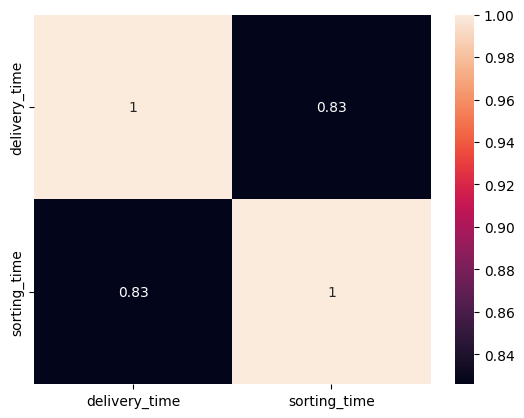

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
# Independent and dependent features
X=df.iloc[:,-1:]
y=df.iloc[:,:1]

In [18]:
sqrt_x = np.sqrt(X)
sqrt_y = np.sqrt(y)

In [19]:
sqrt_x

,sorting_time
0,3.162278
1,2.000000
2,2.449490
3,3.000000
4,3.162278
5,2.449490
6,2.645751
7,1.732051
8,3.162278
9,3.000000


# #after transformation visualization

<AxesSubplot:ylabel='Density'>

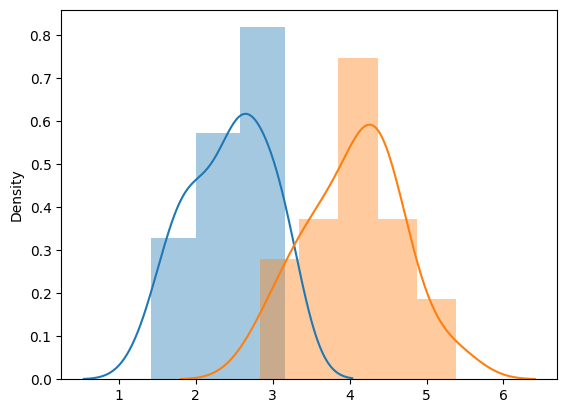

In [20]:
sns.distplot(sqrt_x)
sns.distplot(sqrt_y)

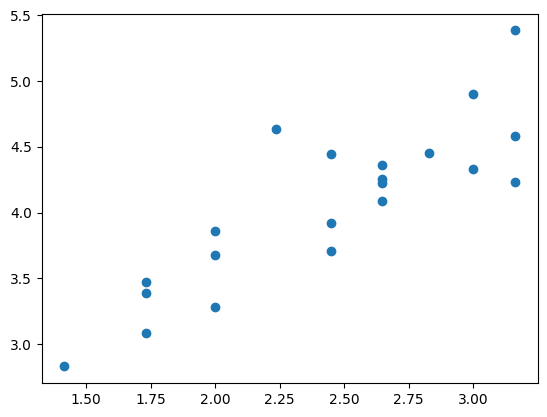

In [21]:
plt.scatter(sqrt_x,sqrt_y)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

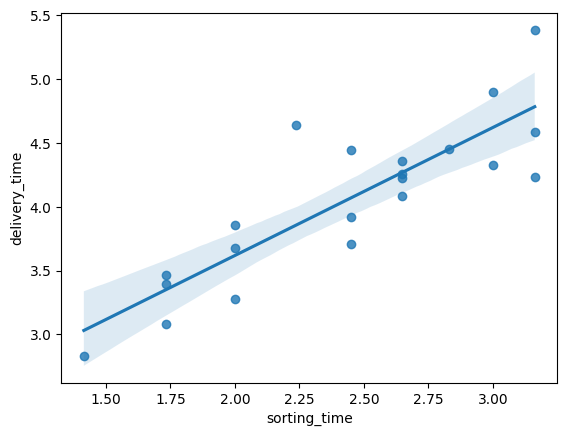

In [22]:

sns.regplot(sqrt_x,sqrt_y)

In [23]:
#creating & traning linear regrisson model
reg = linear_model.LinearRegression()
reg.fit(df[['sorting_time']],df.delivery_time)

LinearRegression()

In [24]:
#prediction using linear regrisson model
reg.predict([[5]])

array([14.82783346])

In [25]:
#coeficient
reg.coef_

array([1.6490199])

In [26]:
#intercept
reg.intercept_

6.58273397199706